<a href="https://colab.research.google.com/github/TurboJapuraEfac/HackerrankPython/blob/master/Rukshi_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
workgroup_df = pd.read_csv("/content/drive/MyDrive/Rukshi Project/Workgroup mapping .csv")
workgroup_df.head()

,Job Role,Event name,Sensitivity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Student,Dashboard viewed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,Grade overview report viewed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,Student,User profile viewed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,Student,Course viewed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Student,User list viewed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
auth_df = pd.read_csv("/content/drive/MyDrive/Rukshi Project/Authenticator pool.csv")
auth_df.head()

,Authenticators,Strength,Usability
0,Text Password,1,4
1,Security Question,2,3
2,OTP - SMS,3,2
3,Graphical Password,4,2
4,Fingerprint,5,1


In [ ]:
logs_df = pd.read_csv("/content/drive/MyDrive/Rukshi Project/Labelled Dataset.csv")
logs_df.head()

,Time,User full name,Event context,Component,Event name,Origin,IP address,Work group,Class
0,"25/11/21, 22:00",Admin User,Course: HIST 22414 - Paleography and Epigraphy...,Recycle bin,Item deleted,cli,NaN,Admin,No risk
1,"25/11/21, 21:31",Admin User,Course: COST 21573 - Interpersonal Communicati...,Recycle bin,Item deleted,cli,NaN,Admin,No risk
2,"25/11/21, 21:00",Admin User,Course: SOST 22452 - Skill Development I (Pres...,Recycle bin,Item deleted,cli,NaN,Admin,No risk
3,"25/11/21, 20:30",Admin User,Course: GEOG 22453 - Economic Geography of the...,Recycle bin,Item deleted,cli,NaN,Admin,No risk
4,"25/11/21, 20:00",Admin User,Course: COST 21573 - Interpersonal Communicati...,Recycle bin,Item deleted,cli,NaN,Admin,No risk


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_time = le.fit_transform(logs_df['Time'])

print(encoded_time)

[4222 4209 4198 ...  727  575  575]


In [ ]:
logs_df['Time'] = encoded_time
print(logs_df)

       Time             User full name  ... Work group    Class
0      4222                 Admin User  ...      Admin  No risk
1      4209                 Admin User  ...      Admin  No risk
2      4198                 Admin User  ...      Admin  No risk
3      4188                 Admin User  ...      Admin  No risk
4      4177                 Admin User  ...      Admin  No risk
...     ...                        ...  ...        ...      ...
28150   728    Ruwan Wickramarachchi .  ...   Lecturer      NaN
28151   727    Ruwan Wickramarachchi .  ...   Lecturer      NaN
28152   727    Ruwan Wickramarachchi .  ...   Lecturer      NaN
28153   575  Dilani Wickramaarachchi .  ...   Lecturer      NaN
28154   575  Dilani Wickramaarachchi .  ...   Lecturer      NaN

[28155 rows x 9 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_name = le.fit_transform(logs_df['User full name'])
encoded_event = le.fit_transform(logs_df['Event context'])
encoded_component = le.fit_transform(logs_df['Component'])
encoded_eventname = le.fit_transform(logs_df['Event name'])
encoded_origin = le.fit_transform(logs_df['Origin'])
encoded_ip = le.fit_transform(logs_df['IP address'])
encoded_workgroup = le.fit_transform(logs_df['Work group'])
encoded_class = le.fit_transform(logs_df['Class'])

In [ ]:
encoded_ip = le.fit_transform(logs_df['IP address'])
print(encoded_ip)

[2735 2735 2735 ...  869  211  211]


In [ ]:
logs_df['Time'] = encoded_time
logs_df['User full name'] = encoded_name
logs_df['Event context'] = encoded_event
logs_df['Component'] = encoded_component
logs_df['Event name'] = encoded_eventname
logs_df['Origin'] = encoded_origin
logs_df['IP address'] = encoded_ip
logs_df['Work group'] = encoded_workgroup
logs_df['Class'] = encoded_class

print(logs_df)

       Time  User full name  Event context  ...  IP address  Work group  Class
0      4222               0            158  ...        2735           0      0
1      4209               0            109  ...        2735           0      0
2      4198               0            249  ...        2735           0      0
3      4188               0            139  ...        2735           0      0
4      4177               0            109  ...        2735           0      0
...     ...             ...            ...  ...         ...         ...    ...
28150   728             266            173  ...         869           1      2
28151   727             266            173  ...         869           1      2
28152   727             266            944  ...         869           1      2
28153   575               1            162  ...         211           1      2
28154   575               1            718  ...         211           1      2

[28155 rows x 9 columns]


In [ ]:
logs_df.head()

,Time,User full name,Event context,Component,Event name,Origin,IP address,Work group,Class
0,4222,0,158,11,31,0,2735,0,0
1,4209,0,109,11,31,0,2735,0,0
2,4198,0,249,11,31,0,2735,0,0
3,4188,0,139,11,31,0,2735,0,0
4,4177,0,109,11,31,0,2735,0,0


In [ ]:
logs_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28155 entries, 0 to 28154
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Time            28155 non-null  int64
 1   User full name  28155 non-null  int64
 2   Event context   28155 non-null  int64
 3   Component       28155 non-null  int64
 4   Event name      28155 non-null  int64
 5   Origin          28155 non-null  int64
 6   IP address      28155 non-null  int64
 7   Work group      28155 non-null  int64
 8   Class           28155 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


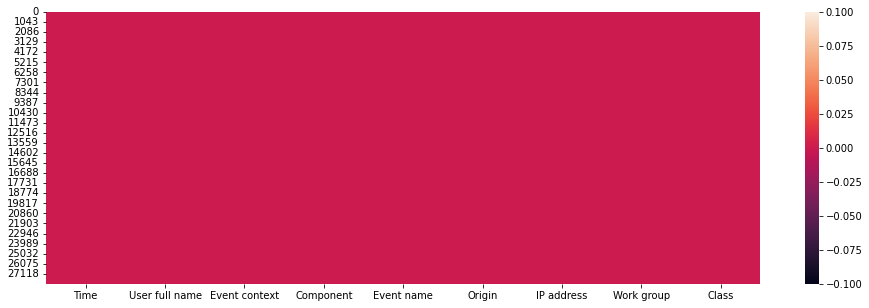

In [ ]:
# check for null value in data
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(logs_df.isnull())

In [ ]:
logs_df['Class'].value_counts()

0    15613
1     9398
2     3144
Name: Class, dtype: int64

In [ ]:
# Drop NaN values
logs_df.drop(logs_df.loc[logs_df['Class']==2].index, inplace=True)

In [ ]:
logs_df.head()

,Time,User full name,Event context,Component,Event name,Origin,IP address,Work group,Class
0,4222,0,158,11,31,0,2735,0,0
1,4209,0,109,11,31,0,2735,0,0
2,4198,0,249,11,31,0,2735,0,0
3,4188,0,139,11,31,0,2735,0,0
4,4177,0,109,11,31,0,2735,0,0


In [ ]:
#Now we have only 2 classes
logs_df['Class'].value_counts()

0    15613
1     9398
Name: Class, dtype: int64

In [ ]:
#reset dataframe index after dropping raws
logs_df = logs_df.sample(frac=1).reset_index(drop=True)

In [ ]:
logs_df.head()

,Time,User full name,Event context,Component,Event name,Origin,IP address,Work group,Class
0,3913,180,167,13,15,2,227,2,0
1,2755,67,447,2,12,2,424,2,0
2,2164,59,6,0,10,2,704,2,1
3,1622,51,150,13,15,2,1720,2,0
4,3355,244,679,4,19,2,435,2,1


In [ ]:
feature_df = logs_df[['Time','User full name', 'Event context', 'Component', 'Event name', 'Origin', 'IP address', 'Work group']]
X = np.asarray(feature_df)
X[0:5]

array([[3913,  180,  167,   13,   15,    2,  227,    2],
       [2755,   67,  447,    2,   12,    2,  424,    2],
       [2164,   59,    6,    0,   10,    2,  704,    2],
       [1622,   51,  150,   13,   15,    2, 1720,    2],
       [3355,  244,  679,    4,   19,    2,  435,    2]])

In [ ]:
logs_df['Class'] = logs_df['Class'].astype('int')
y = np.asarray(logs_df['Class'])
y [0:5]

array([0, 0, 1, 0, 1])

In [ ]:
# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20008, 8) (20008,)
Test set: (5003, 8) (5003,)


### **Support Vector Machine**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [ ]:
# This is how we save the created model
# This will be saved in the files folder in colab
# You can download it from there

import pickle

with open('modelrbf.pkl','wb') as f:
    pickle.dump(clf,f)

with open('modelrbf.pkl', 'rb') as f:
    clf = pickle.load(f)

clf.predict(X_test[0:10])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.68      0.90      0.78      3097
           1       0.67      0.32      0.44      1906

    accuracy                           0.68      5003
   macro avg       0.68      0.61      0.61      5003
weighted avg       0.68      0.68      0.65      5003

Confusion matrix, without normalization
[[2802  295]
 [1294  612]]


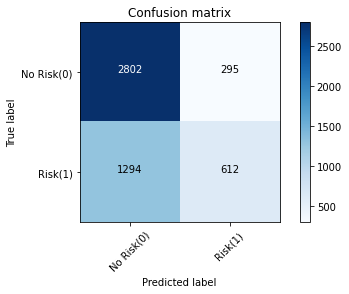

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Risk(0)','Risk(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
#  f1_score

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6480487537772907

In [ ]:
# jaccard index

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.6381234342974266

In [ ]:
'''
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called 
kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
'''
# Here we can change our model and test in each case. But it is time consuming

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted')) 
# print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2)) 

In [ ]:
# This is how we save the created model

import pickle 

with open('model.pkl','wb') as f:
    pickle.dump(clf2,f)

with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X[0:10])

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Risk(0)','Risk(1)'],normalize= False,  title='Confusion matrix')

### **Logistic Regression**

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.46600086,  0.69577203, -0.62214997,  0.81707433, -0.4398325 ,
         0.25787423, -0.99953334,  0.20770781],
       [ 0.47485121, -0.99399942,  0.30154722, -1.15414848, -0.65567542,
         0.25787423, -0.77786504,  0.20770781],
       [-0.03099459, -1.11362926, -1.15327585, -1.51255263, -0.79957071,
         0.25787423, -0.46280348,  0.20770781],
       [-0.49490056, -1.23325909, -0.67823158,  0.81707433, -0.4398325 ,
         0.25787423,  0.68041986,  0.20770781],
       [ 0.98840025,  1.65281073,  1.06689631, -0.79574433, -0.15204193,
         0.25787423, -0.76548762,  0.20770781]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20008, 8) (20008,)
Test set: (5003, 8) (5003,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
# The shape of coef_ attribute should be: (# of classes, # of features)
print(LR.coef_)

[[ 0.01784835 -0.07129943  0.07675168 -0.15411323  0.08169515 -0.54962093
   0.35998712  0.24133514]]


In [ ]:
# If you also need an intercept (AKA bias) column, then use this
np.hstack((LR.intercept_[:,None], LR.coef_))

# this will give you an array of shape: (n_classes, n_features + 1)

array([[-0.50312626,  0.01784835, -0.07129943,  0.07675168, -0.15411323,
         0.08169515, -0.54962093,  0.35998712,  0.24133514]])

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
'''
predict_proba returns estimates for all classes, ordered by the label of classes.
So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

'''
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.69, 0.31],
       [0.64, 0.36],
       [0.14, 0.86],
       ...,
       [0.72, 0.28],
       [0.75, 0.25],
       [0.54, 0.46]])

In [ ]:
# This is how we save the created model

import pickle 

with open('modelLR.pkl','wb') as f:
    pickle.dump(LR,f)

with open('modelLR.pkl', 'rb') as f:
    LRsaved = pickle.load(f)

LRsaved.predict(X_test[10:20])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
'''
we can define jaccard as the size of the intersection divided by the size of the union of two label sets.
If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
'''
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.6597361949474626

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[2951  146]
 [1376  530]]


              precision    recall  f1-score   support

           0       0.68      0.95      0.79      3097
           1       0.78      0.28      0.41      1906

    accuracy                           0.70      5003
   macro avg       0.73      0.62      0.60      5003
weighted avg       0.72      0.70      0.65      5003

Confusion matrix, without normalization
[[2951  146]
 [1376  530]]


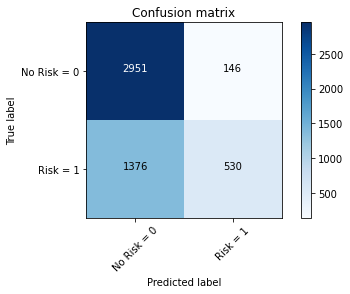

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Risk = 0','Risk = 1'],normalize= False,  title='Confusion matrix')

In [ ]:
'''
In logistic regression, the output can be the probability of event risk is yes (or equals to 1). 
This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output
is a probability value between 0 and 1.
'''

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5883923739280063

In [ ]:
# Build Logistic Regression model again for the same dataset, using different solver and regularization values

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train) 
yhat_prob2 = LR2.predict_proba(X_test) 
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.59


### K Nearest Neighbours

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.61,  1.56,  1.09,  0.82, -0.44,  0.26,  0.67,  0.21],
       [-0.19, -0.08,  0.39, -1.15, -0.8 ,  0.26, -0.76,  0.21],
       [ 0.72,  0.68, -0.63,  0.82, -0.44,  0.26, -1.02,  0.21],
       [ 0.02, -0.31,  1.09, -0.26, -0.8 , -2.99,  1.82,  0.21],
       [ 0.63, -0.86, -1.15, -1.51,  1.86,  0.26, -0.96,  0.21]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20008, 8) (20008,)
Test set: (5003, 8) (5003,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# This is how we save the created model

import pickle 

with open('modelneigh.pkl','wb') as f:
    pickle.dump(neigh,f)

with open('modelneigh.pkl', 'rb') as f:
    Neighsaved = pickle.load(f)

Neighsaved.predict(X_test[10:20])

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9480707716913235
Test set Accuracy:  0.9166500099940036


In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94, 0.93, 0.93, 0.92, 0.92, 0.91, 0.91, 0.9 , 0.9 , 0.89, 0.89,
       0.89, 0.89, 0.88, 0.89, 0.88, 0.88, 0.88, 0.87])

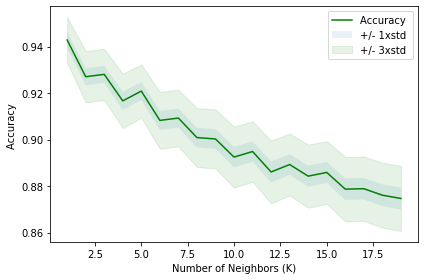

In [ ]:
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
k = 1
#Train Model and Predict  
neighbest = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbest

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# This is how we save the created model

import pickle 

with open('modelneighbest.pkl','wb') as f:
    pickle.dump(neighbest,f)

with open('modelneighbest.pkl', 'rb') as f:
    Neighbestsaved = pickle.load(f)

Neighbestsaved.predict(X_test[10:20])

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
yhat = Neighbestsaved.predict(X_test)
yhat

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[2997  100]
 [ 186 1720]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3097
           1       0.95      0.90      0.92      1906

    accuracy                           0.94      5003
   macro avg       0.94      0.94      0.94      5003
weighted avg       0.94      0.94      0.94      5003

Confusion matrix, without normalization
[[2997  100]
 [ 186 1720]]


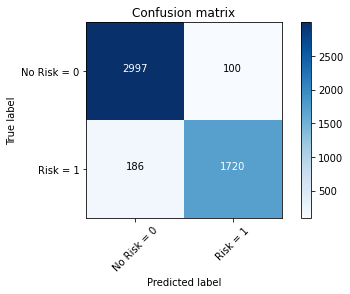

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Risk = 0','Risk = 1'],normalize= False,  title='Confusion matrix')